In [1]:
import torchvision
import torch
from torchvision.datasets import ImageFolder

from PIL import Image
import os, os.path
from skimage import io

import torchvision.transforms as transforms

import pandas as pd
from torch.utils.data import Dataset

import numpy as np

torch.manual_seed(10)
np.random.seed(10)

In [2]:
!python -m pip install -U scikit-image
!pip install pandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 13.5 MB 91.5 MB/s eta 0:00:01
^C
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/environment/miniconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/environment/miniconda3/lib/python3.7/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/environment/miniconda3/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/environment/miniconda3/lib/python3.7/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/environment/miniconda3/lib/python3.7/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParse

In [2]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", DEVICE)

device: cuda


In [2]:
# import torch

# # 直接设置为使用 CPU
# DEVICE = torch.device("cpu")
# print("device:", DEVICE)


device: cpu


In [120]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
%pip install setuptools -U

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install --use-pep517 google-colab

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 107.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 115.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 kB 174.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 173.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 197.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml

In [12]:
%pip install --upgrade setuptools

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install --use-pep517 google-colab


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 87.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 kB 170.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 173.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 172.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml

In [8]:
!pip install --upgrade pip setuptools wheel

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 199.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 196.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 106.3 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.8.0
    Uninstalling setuptools-67.8.0:
      Successfully uninstalled setuptools-67.8.0
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [6]:
# unzip the data
!unzip /content/drive/MyDrive/LMU/SS2022/UDLSeminar/DiabeticRetinopathyGrading.zip

unzip:  cannot find or open /content/drive/MyDrive/LMU/SS2022/UDLSeminar/DiabeticRetinopathyGrading.zip, /content/drive/MyDrive/LMU/SS2022/UDLSeminar/DiabeticRetinopathyGrading.zip.zip or /content/drive/MyDrive/LMU/SS2022/UDLSeminar/DiabeticRetinopathyGrading.zip.ZIP.


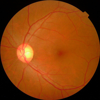

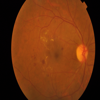

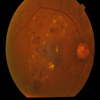

In [5]:
# visualize the images
# path = 'input/diabetic-retinopathy-resized/resized_train/'
path = 'input/aptos2019-blindness-detection/train_images/'
filename = os.listdir(path)
for i in range(3):
    im = Image.open(path + '/' + filename[i]) 
    im = im.resize((100,100))
    display(im)

In [6]:
# get image size
# path = 'input/diabetic-retinopathy-resized/resized_train'
path = 'input/aptos2019-blindness-detection/train_images/'
filename = os.listdir(path)
for i in range(13):
    im = Image.open(path + '/' + filename[i])
    transform = transforms.ToTensor()
    display(transform(im).shape)

torch.Size([3, 1050, 1050])

torch.Size([3, 2136, 3216])

torch.Size([3, 2588, 3388])

torch.Size([3, 1536, 2048])

torch.Size([3, 2136, 3216])

torch.Size([3, 2136, 3216])

torch.Size([3, 1958, 2588])

torch.Size([3, 1958, 2588])

torch.Size([3, 1736, 2416])

torch.Size([3, 1050, 1050])

torch.Size([3, 614, 819])

torch.Size([3, 1736, 2416])

torch.Size([3, 1736, 2416])

# Constants

In [3]:
IMAGE_SIZE = 224
NUM_CHANNELS = 3
BATCH_SIZE = 48
EPOCHS = 100
NUM_WORKERS = 0

# TRAIN_SIZE = 27000

# ROOT_DIR = 'preprocessed_images/2015&2019_total'
# CSV_FILE = 'preprocessed_images/merged_2015_2019_dataframe.csv'

ROOT_DIR = 'preprocessed_images/2019_agument_total/'
CSV_FILE = 'preprocessed_images/2019_agument.csv'

PATH = 'swin_saved_model'
MIN_PATH ='swin_saved_model/min_loss_model'

NUM_CLASSES = 5

LEARNING_RATE = 1e-5
WEIGHT_DECAY = 5e-4

# Labels

In [4]:
df = pd.read_csv(CSV_FILE)
df.iloc[:,1].unique()

array([0, 4, 2, 3, 1])

# Dataloader

In [5]:
import os
import torch
from PIL import Image
import pandas as pd

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, annotations_file, root_dir, transform=None):
        """
        初始化数据集。
        :param annotations_file: 标注文件的路径。
        :param root_dir: 包含所有图像的目录。
        :param transform: 一个可选的转换函数，用于对样本进行处理。
        """
        self.annotations = pd.read_csv(annotations_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        """
        数据集中的样本数。
        """
        return len(self.annotations)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.annotations.iloc[idx, 0]+'.png')
        # image = read_image(img_name)
        image = Image.open(img_name)
        annotation = self.annotations.iloc[idx, 1]
        annotation = annotation.astype('int')
        # sample = {'image': image, 'label': annotation}

        if self.transform:
            image = self.transform(image)

        return image, annotation

In [6]:
transform = transforms.Compose([transforms.PILToTensor(),
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ConvertImageDtype(torch.float)])

In [7]:
dataset = CustomDataset(CSV_FILE, ROOT_DIR, transform)

In [8]:
gen = torch.Generator()
gen.manual_seed(0)

In [9]:
# 假设 dataset 是您的数据集对象
total_size = len(dataset)  # 获取数据集的总大小
print(total_size)
# 计算训练集大小为数据集的80%
TRAIN_SIZE = int(total_size * 0.8)

# 计算验证集大小
VAL_SIZE = total_size - TRAIN_SIZE

# 使用 torch.utils.data.random_split 来分割数据集
train_set, val_set = torch.utils.data.random_split(dataset, [TRAIN_SIZE, VAL_SIZE])

# 打印出训练集和验证集的大小来验证
print(f"Training Set Size: {TRAIN_SIZE}")
print(f"Validation Set Size: {VAL_SIZE}")
# train_set, val_set = torch.utils.data.random_split(dataset, [TRAIN_SIZE, len(dataset) - TRAIN_SIZE],generator=gen)

# len(train_set), len(val_set)

9234
Training Set Size: 7387
Validation Set Size: 1847


# 如果图片以文件夹命名分类，想转换成表格的形式，请使用下述方法：

In [14]:
import os
import csv

# 你的图片存放的根目录路径
root_dir = "preprocessed_images/2019_agument"  # 请确保替换为你的实际路径

# 输出CSV文件的路径
output_csv_path = "preprocessed_images/2019_agument.csv"  # 可以根据需要更改路径

# 遍历目录并收集数据
data = []
for label in os.listdir(root_dir):
    # 跳过.ipynb_checkpoints目录
    if label == ".ipynb_checkpoints":
        continue

    label_dir = os.path.join(root_dir, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # 移除文件扩展名，获取图像名称
                image_name_without_extension = os.path.splitext(image_name)[0]
                data.append([image_name_without_extension, label])

# 写入CSV文件
with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id_code", "diagnosis"])  # 写入列名
    writer.writerows(data)  # 写入数据

print(f"CSV文件已生成并保存在{output_csv_path}")


CSV文件已生成并保存在preprocessed_images/2019_agument.csv


In [5]:
#合并图像

import shutil
import os

# 源目录路径：包含子文件夹和图片的根目录
source_dir = "preprocessed_images/2019_agument"

# 目标目录路径：所有图片将被复制到这个新目录中
target_dir = "preprocessed_images/2019_agument_total"

# 确保目标目录存在，如果不存在，则创建
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# 遍历源目录中的所有子目录和文件
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # 检查文件是否是图片（根据扩展名）
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            # 构建完整的文件路径
            file_path = os.path.join(root, file)
            # 构建目标文件路径
            target_file_path = os.path.join(target_dir, file)
            
            # 复制文件
            shutil.copy(file_path, target_file_path)

print(f"所有图片已经从{source_dir}复制到{target_dir}")


所有图片已经从preprocessed_images/2019_agument复制到preprocessed_images/2019_agument_total


# 以文件夹命名分类时使用下述方法：

In [10]:
from torchvision import datasets, transforms

ROOT_DIR='preprocessed_images/total/'

# 定义图像预处理
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 使用ImageFolder加载数据
dataset = datasets.ImageFolder(root=ROOT_DIR, transform=transform)

# 确保这是数据集当前的总大小
total_size = len(dataset)  

# 计算训练集大小为数据集的80%，确保为整数
TRAIN_SIZE = int(total_size * 0.8)

# 直接计算验证集大小，以避免任何四舍五入误差
VAL_SIZE = total_size - TRAIN_SIZE

# 再次使用 torch.utils.data.random_split 来分割数据集
train_set, val_set = torch.utils.data.random_split(dataset, [TRAIN_SIZE, VAL_SIZE], generator=torch.Generator().manual_seed(42))

print(f"Training Set Size: {len(train_set)}")
print(f"Validation Set Size: {len(val_set)}")



# # 使用torch.utils.data的random_split函数分割数据集
# train_set, val_set = torch.utils.data.random_split(dataset, [TRAIN_SIZE, VAL_SIZE], generator=torch.Generator().manual_seed(42))

# print(f"Training Set Size: {len(train_set)}")
# print(f"Validation Set Size: {len(val_set)}")


Training Set Size: 7330
Validation Set Size: 1833


In [10]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True,
                                           num_workers=NUM_WORKERS, pin_memory=True)

val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True,
                                           num_workers=NUM_WORKERS, pin_memory=True)

In [11]:
images, labels = next(iter(train_loader))
display(images[0].shape, labels[0])

torch.Size([3, 224, 224])

tensor(0)

# MODEL

In [4]:
!pip install transformers

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 7.2 MB 44.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 98.1 MB/s eta 0:00:01
     |████████████████████████████████| 761 kB 92.0 MB/s eta 0:00:01
     |████████████████████████████████| 268 kB 108.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 104.3 MB/s eta 0:00:01
     |████████████████████████████████| 143 kB 103.4 MB/s eta 0:00:01


In [21]:
!pip install protobuf==3.20.3


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.0 MB 77.9 MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1


In [12]:
from transformers import SwinModel, SwinConfig

# Initializing a Swin microsoft/swin-tiny-patch4-window7-224 style configuration
configuration = SwinConfig( image_size = IMAGE_SIZE, num_channels = NUM_CHANNELS, num_labels = 5)

In [13]:
from transformers import AutoFeatureExtractor, SwinForImageClassification

# download pretrained model
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224", config = configuration, ignore_mismatched_sizes=True)

/environment/miniconda3/lib/python3.7/site-packages/transformers/models/vit/feature_extraction_vit.py:31: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  FutureWarning,
Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import AutoFeatureExtractor, SwinForImageClassification

# 加载特征提取器
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swinv2-tiny-patch4-window8-256")

# 加载预训练的Swin Transformer模型
model = SwinForImageClassification.from_pretrained("microsoft/swinv2-tiny-patch4-window8-256")


/environment/miniconda3/lib/python3.7/site-packages/transformers/models/vit/feature_extraction_vit.py:31: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  FutureWarning,
You are using a model of type swinv2 to instantiate a model of type swin. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at microsoft/swinv2-tiny-patch4-window8-256 were not used when initializing SwinForImageClassification: ['swinv2.encoder.layers.3.blocks.1.layernorm_after.bias', 'swinv2.encoder.layers.2.blocks.0.layernorm_after.bias', 'swinv2.encoder.layers.2.blocks.4.attention.self.value.bias', 'swinv2.encoder.layers.2.blocks.1.attention.self.key.weight', 'swinv2.encoder.layers.2.blocks.0.layernorm_before.bias', 'swinv2.encoder.layers.2.blocks.5.attention.output.dense.bias', 'swinv2.encoder.layers.3.blocks.0.attention.self.value.weight', 'swinv2.encod

In [2]:
####训练能到80
from transformers import AutoFeatureExtractor, SwinForImageClassification

# 加载特征提取器
feature_extractor = AutoFeatureExtractor.from_pretrained("dvs/swin-tiny-patch4-window7-224-uploads-classifier-v2")

# 加载预训练的Swin Transformer模型
model = SwinForImageClassification.from_pretrained("dvs/swin-tiny-patch4-window7-224-uploads-classifier-v2")


In [14]:
# 首先，检查是否有可用的CUDA设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 然后，将模型转移到选定的设备
model.to(device)

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0): SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
        

In [15]:
inputs, labels = next(iter(train_loader))
inputs = inputs.to(DEVICE)  # 将输入数据转移到设定的设备上
labels = labels.to(DEVICE)  # 将标签数据转移到设定的设备上
# forward + backward + optimize
outputsClass = model(inputs)

In [16]:
outputsClass.logits.shape

torch.Size([48, 5])

# TRAIN - PYTORCH

In [28]:
!pip install torchmetrics

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 519 kB 71.6 MB/s eta 0:00:01


In [17]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch import nn
from torchmetrics import F1Score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay = WEIGHT_DECAY)

# set F1 score
# f1 =  F1Score(num_classes=NUM_CLASSES, average='none', task='multiclass')
f1 = F1Score(num_classes=NUM_CLASSES, average='macro', task='multiclass').to(device)


In [20]:

# import torch

# # 直接设置为使用 CPU
# DEVICE = torch.device("cpu")
# print("device:", DEVICE)



device: cpu


# train model without freezing the layers

---从头开始训练模型或者在一个与模型原始训练集显著不同的新数据集上微调预训练模型时使用



In [139]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [18]:
##如果需要测试代码是否顺利运行请运行下面代码
from torch.utils.data import Subset
import numpy as np

# 假定 train_set 和 val_set 是您的完整训练和验证数据集

# 选择一个较小的数据集大小百分比
subset_percentage = 0.1  # 例如，使用10%的数据

# 计算新的子集大小
train_subset_size = int(subset_percentage * len(train_set))
val_subset_size = int(subset_percentage * len(val_set))

# 随机选择子集索引
train_indices = np.random.choice(len(train_set), train_subset_size, replace=False)
val_indices = np.random.choice(len(val_set), val_subset_size, replace=False)

# 创建子集
train_subset = Subset(train_set, indices=train_indices)
val_subset = Subset(val_set, indices=val_indices)

# 使用子集更新 DataLoader
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)


In [19]:
# 首先，检查是否有可用的CUDA设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 然后，将模型转移到选定的设备
model.to(device)

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0): SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
        

In [17]:
!pip install ipywidgets --upgrade
!jupyter nbextension enable --py widgetsnbextension  # Only for Jupyter Notebook


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [48]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [18]:
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

EPOCHS = 30
MIN_PATH = 'swin_model/min_loss_model.pth'
PATH = 'swin_model/last_model.pth'
train_loss_values = []
train_f1 = []
train_acc=[]

val_loss_values = []
val_f1 = []
val_acc = []

last_val_loss = 1000
min_val_loss = 100
patience = 5
triggertimes = 0

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    val_loss = 0.0
    
    train_f1_epoch = 0.0
    train_acc_epoch = 0.0
    val_f1_epoch = 0.0
    val_acc_epoch = 0.0

    model.train()
    train_loop = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}/{EPOCHS} [Training]')

    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.logits, labels)
        
        # 获取最可能的类别索引
        _, preds = torch.max(outputs.logits, dim=1)
        # 更新累计的 F1 分数
        train_f1_epoch += f1(preds, labels).item()
        train_acc_epoch += accuracy_score(preds.cpu(), labels.cpu())  # Accumulate training accuracy

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # 更新进度条信息
        train_loop.set_postfix(loss=running_loss/(i+1), f1=train_f1_epoch/(i+1))

    avg_train_loss = running_loss / len(train_loader)
    avg_train_f1 = train_f1_epoch / len(train_loader) 
    avg_train_acc = train_acc_epoch / len(train_loader)
    
    train_loss_values.append(avg_train_loss)
    train_f1.append(avg_train_f1)
    train_acc.append(avg_train_acc)
    
    model.eval()

# 同样为验证循环添加进度条
    val_loop = tqdm(enumerate(val_loader), total=len(val_loader), desc=f'Epoch {epoch+1}/{EPOCHS} [Validation]')

    with torch.no_grad():
        for i, data in enumerate(val_loader):
                    inputs, labels = data
                    inputs = inputs.to(DEVICE)
                    labels = labels.to(DEVICE)

                    outputs = model(inputs)
                    loss = criterion(outputs.logits, labels)

                    # 获取最可能的类别索引并计算 F1 分数
                    _, preds = torch.max(outputs.logits, dim=1)
                    val_f1_epoch += f1(preds, labels).item()
                    val_acc_epoch += accuracy_score(preds.cpu(), labels.cpu())
                    
                    val_loss += loss.item()
                    
                    val_loop.set_postfix(loss=val_loss/(i+1), f1=val_f1_epoch/(i+1))
                        
        avg_val_loss = val_loss / len(val_loader)
        avg_val_f1 = val_f1_epoch / len(val_loader) 
        avg_val_acc = val_acc_epoch / len(val_loader)
        # 检查路径是否存在，如果不存在则创建
        min_path_dir = os.path.dirname(MIN_PATH)
        path_dir = os.path.dirname(PATH)
        if not os.path.exists(min_path_dir):
            os.makedirs(min_path_dir)
        if not os.path.exists(path_dir):
            os.makedirs(path_dir)

        # 每5个epoch检查一次，是否需要保存模型
        if epoch % 5 == 0:
            print('Epoch:', epoch, 'avg_val_loss:', avg_val_loss)
            # 每5个epoch保存一次模型状态，无论验证损失如何
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
            }, PATH + f"_epoch_{epoch}.pth")  # 保存时给文件名添加epoch编号

            # 如果当前验证损失低于之前最低的验证损失，更新最低验证损失并保存模型
            if avg_val_loss < min_val_loss:
                print('New min val loss:', avg_val_loss)
                # 保存当前最佳模型状态
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss,
                }, MIN_PATH)
                min_val_loss = avg_val_loss

        # early stopping
        if avg_val_loss > last_val_loss:
            trigger_times += 1
            print('Trigger Times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStop training.')
                # save the model
                torch.save({'epoch': epoch,
                            'model_state_dict': model.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            'loss': loss,
                            }, PATH)
                break
        else:
            print('trigger times: 0')
            trigger_times = 0

        last_val_loss = avg_val_loss
        
        val_loss_values.append(avg_val_loss)
        val_f1.append(avg_val_f1)
        val_acc.append(avg_val_acc)
    scheduler.step(avg_val_loss)  # 更新学习率
    print(f'[Epoch: {epoch + 1}] train loss: {avg_train_loss:.3f} val loss:{avg_val_loss:.3f} ')
    print(f'[Epoch: {epoch + 1}] train f1: {avg_train_f1:.3f} val f1:{avg_val_f1:.3f} ')
    print(f'[Epoch: {epoch + 1}] train acc: {avg_train_acc:.3f} val acc:{avg_val_acc:.3f} ')

print('Finished Training')

Epoch 1/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 1/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Epoch: 0 avg_val_loss: 0.7894407877555261
New min val loss: 0.7894407877555261
trigger times: 0
[Epoch: 1] train loss: 1.063 val loss:0.789 
[Epoch: 1] train f1: 0.541 val f1:0.651 
[Epoch: 1] train acc: 0.561 val acc:0.673 


Epoch 2/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 2/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 2] train loss: 0.715 val loss:0.648 
[Epoch: 2] train f1: 0.695 val f1:0.722 
[Epoch: 2] train acc: 0.710 val acc:0.740 


Epoch 3/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 3/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 3] train loss: 0.592 val loss:0.563 
[Epoch: 3] train f1: 0.762 val f1:0.757 
[Epoch: 3] train acc: 0.772 val acc:0.772 


Epoch 4/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 4/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 4] train loss: 0.494 val loss:0.554 
[Epoch: 4] train f1: 0.806 val f1:0.766 
[Epoch: 4] train acc: 0.815 val acc:0.782 


Epoch 5/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 5/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 5] train loss: 0.418 val loss:0.514 
[Epoch: 5] train f1: 0.836 val f1:0.792 
[Epoch: 5] train acc: 0.843 val acc:0.800 


Epoch 6/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 6/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Epoch: 5 avg_val_loss: 0.46576326053876144
New min val loss: 0.46576326053876144
trigger times: 0
[Epoch: 6] train loss: 0.340 val loss:0.466 
[Epoch: 6] train f1: 0.867 val f1:0.804 
[Epoch: 6] train acc: 0.873 val acc:0.814 


Epoch 7/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 7/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 7] train loss: 0.286 val loss:0.414 
[Epoch: 7] train f1: 0.896 val f1:0.842 
[Epoch: 7] train acc: 0.901 val acc:0.849 


Epoch 8/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 8/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 8] train loss: 0.251 val loss:0.354 
[Epoch: 8] train f1: 0.905 val f1:0.872 
[Epoch: 8] train acc: 0.909 val acc:0.879 


Epoch 9/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 9/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 1
[Epoch: 9] train loss: 0.217 val loss:0.366 
[Epoch: 9] train f1: 0.925 val f1:0.853 
[Epoch: 9] train acc: 0.929 val acc:0.861 


Epoch 10/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 10/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 2
[Epoch: 10] train loss: 0.180 val loss:0.369 
[Epoch: 10] train f1: 0.936 val f1:0.867 
[Epoch: 10] train acc: 0.939 val acc:0.874 


Epoch 11/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 11/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Epoch: 10 avg_val_loss: 0.3456983172740692
New min val loss: 0.3456983172740692
trigger times: 0
[Epoch: 11] train loss: 0.153 val loss:0.346 
[Epoch: 11] train f1: 0.948 val f1:0.874 
[Epoch: 11] train acc: 0.950 val acc:0.881 


Epoch 12/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 12/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 1
[Epoch: 12] train loss: 0.142 val loss:0.349 
[Epoch: 12] train f1: 0.953 val f1:0.878 
[Epoch: 12] train acc: 0.954 val acc:0.885 


Epoch 13/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 13/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 13] train loss: 0.115 val loss:0.346 
[Epoch: 13] train f1: 0.962 val f1:0.875 
[Epoch: 13] train acc: 0.965 val acc:0.885 


Epoch 14/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 14/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 14] train loss: 0.111 val loss:0.305 
[Epoch: 14] train f1: 0.965 val f1:0.895 
[Epoch: 14] train acc: 0.966 val acc:0.899 


Epoch 15/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 15/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 1
[Epoch: 15] train loss: 0.094 val loss:0.343 
[Epoch: 15] train f1: 0.969 val f1:0.889 
[Epoch: 15] train acc: 0.972 val acc:0.895 


Epoch 16/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 16/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Epoch: 15 avg_val_loss: 0.32944437364737195
New min val loss: 0.32944437364737195
trigger times: 0
[Epoch: 16] train loss: 0.092 val loss:0.329 
[Epoch: 16] train f1: 0.969 val f1:0.897 
[Epoch: 16] train acc: 0.971 val acc:0.904 


Epoch 17/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 17/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 17] train loss: 0.090 val loss:0.327 
[Epoch: 17] train f1: 0.969 val f1:0.892 
[Epoch: 17] train acc: 0.971 val acc:0.903 


Epoch 18/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 18/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 1
[Epoch: 18] train loss: 0.077 val loss:0.332 
[Epoch: 18] train f1: 0.976 val f1:0.897 
[Epoch: 18] train acc: 0.978 val acc:0.899 


Epoch 19/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 19/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 2
[Epoch: 19] train loss: 0.075 val loss:0.347 
[Epoch: 19] train f1: 0.975 val f1:0.884 
[Epoch: 19] train acc: 0.976 val acc:0.891 


Epoch 20/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 20/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 20] train loss: 0.069 val loss:0.304 
[Epoch: 20] train f1: 0.978 val f1:0.907 
[Epoch: 20] train acc: 0.979 val acc:0.913 


Epoch 21/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 21/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Epoch: 20 avg_val_loss: 0.3646042834107692
Trigger Times: 1
[Epoch: 21] train loss: 0.068 val loss:0.365 
[Epoch: 21] train f1: 0.977 val f1:0.886 
[Epoch: 21] train acc: 0.978 val acc:0.892 


Epoch 22/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 22/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 22] train loss: 0.060 val loss:0.339 
[Epoch: 22] train f1: 0.978 val f1:0.896 
[Epoch: 22] train acc: 0.980 val acc:0.904 


Epoch 23/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 23/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 23] train loss: 0.054 val loss:0.321 
[Epoch: 23] train f1: 0.982 val f1:0.898 
[Epoch: 23] train acc: 0.984 val acc:0.910 


Epoch 24/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 24/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 1
[Epoch: 24] train loss: 0.057 val loss:0.337 
[Epoch: 24] train f1: 0.982 val f1:0.891 
[Epoch: 24] train acc: 0.983 val acc:0.901 


Epoch 25/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 25/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 25] train loss: 0.058 val loss:0.325 
[Epoch: 25] train f1: 0.980 val f1:0.902 
[Epoch: 25] train acc: 0.981 val acc:0.907 


Epoch 26/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 26/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Epoch: 25 avg_val_loss: 0.3917864703406126
Trigger Times: 1
[Epoch: 26] train loss: 0.045 val loss:0.392 
[Epoch: 26] train f1: 0.984 val f1:0.888 
[Epoch: 26] train acc: 0.986 val acc:0.895 


Epoch 27/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 27/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 27] train loss: 0.046 val loss:0.326 
[Epoch: 27] train f1: 0.985 val f1:0.909 
[Epoch: 27] train acc: 0.986 val acc:0.914 


Epoch 28/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 28/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 28] train loss: 0.048 val loss:0.322 
[Epoch: 28] train f1: 0.985 val f1:0.904 
[Epoch: 28] train acc: 0.985 val acc:0.907 


Epoch 29/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 29/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

Trigger Times: 1
[Epoch: 29] train loss: 0.044 val loss:0.360 
[Epoch: 29] train f1: 0.986 val f1:0.901 
[Epoch: 29] train acc: 0.987 val acc:0.904 


Epoch 30/30 [Training]:   0%|          | 0/154 [00:00<?, ?it/s]

Epoch 30/30 [Validation]:   0%|          | 0/39 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 30] train loss: 0.037 val loss:0.330 
[Epoch: 30] train f1: 0.987 val f1:0.913 
[Epoch: 30] train acc: 0.987 val acc:0.917 
Finished Training


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [1.063431876046317, 0.7145682801673938, 0.5920117600010587, 0.49402072329025765, 0.41791353500508643, 0.33979410716852587, 0.28606568712305713, 0.25052148887476366, 0.21691388346545107, 0.1800315168190312, 0.1533413509560096, 0.1422232421260182, 0.11467002061280337, 0.11110029507476787, 0.0936389806885998, 0.09202564355324615, 0.08952488418813649, 0.07748347797806, 0.07498287874600523, 0.06922911828407993, 0.06842184182885405, 0.0604570137500134, 0.05374134006281081, 0.05669722585884443, 0.05802625603671488, 0.045438915318748975, 0.045912406667341275, 0.04787398053048929, 0.04357518960250082, 0.03672868731301641] [0.7894407877555261, 0.6477219172013111, 0.5631111126679641, 0.5538311822292132, 0.5140376740541214, 0.46576326053876144, 0.4144978660803575, 0.3538207654387523, 0.3660265644773459, 0.36933500071366626, 0.3456983172740692, 0.34913775668694425, 0.34612413151906085, 0.3053799563875565, 0

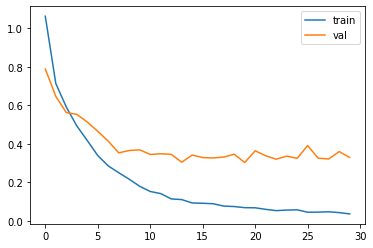

In [19]:
import matplotlib.pyplot as plt
import numpy as np 

x = np.arange(EPOCHS)
y = train_loss_values
z = val_loss_values
print(x,y,z) 
# plot lines
plt.plot(x, y, label = "train")
plt.plot(x, z, label = "val")
plt.legend()
plt.show()

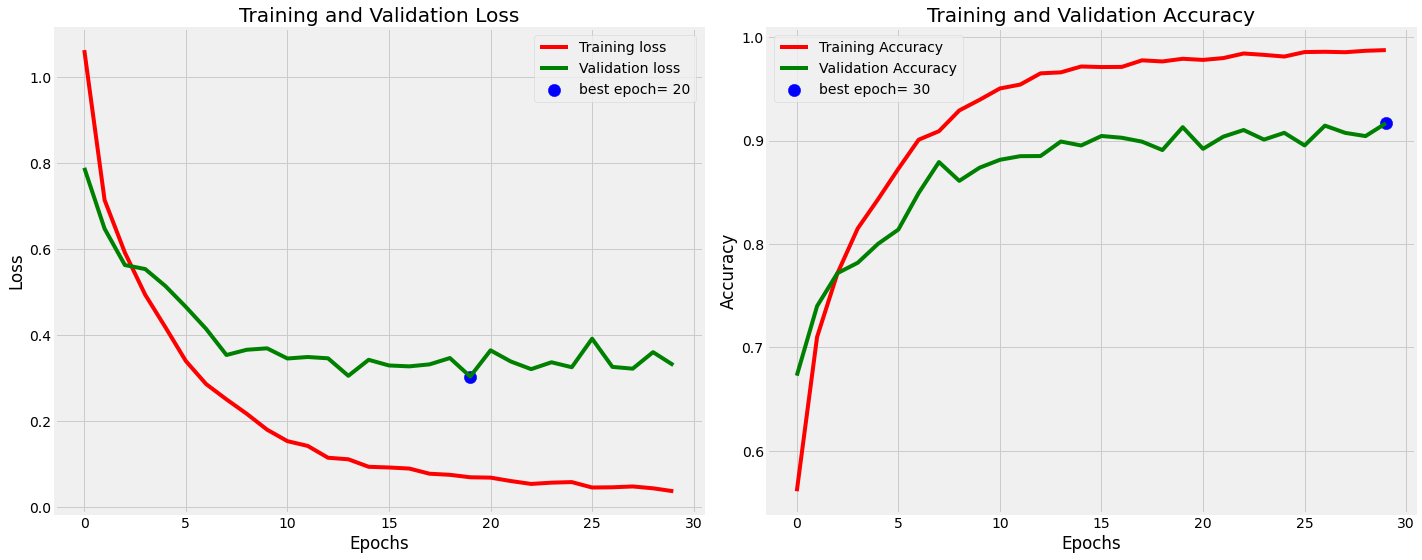

In [20]:
import matplotlib.pyplot as plt
import numpy as np 

# 定义需要的变量
x = np.arange(EPOCHS)
train_loss = train_loss_values
val_loss = val_loss_values
train_acc = train_acc
val_acc = val_acc

# 找到最佳的epoch
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

# 绘制训练历史
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

# 绘制损失图
plt.subplot(1, 2, 1)
plt.plot(x, train_loss, 'r', label= 'Training loss')
plt.plot(x, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss, val_lowest, s= 150, c= 'blue', label= f'best epoch= {str(index_loss + 1)}')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 绘制准确率图
plt.subplot(1, 2, 2)
plt.plot(x, train_acc, 'r', label= 'Training Accuracy')
plt.plot(x, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc, acc_highest, s= 150, c= 'blue', label= f'best epoch= {str(index_acc + 1)}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [99]:
%pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [21]:
# find the min training loss and the epoch number of that loss
np.argmin(val_loss_values), min(val_loss_values)

(19, 0.30367288580880714)

In [25]:
PATH='thebest_swin_30.pth'
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, PATH)

# Model with frozen layers
冻结预训练模型的一部分层（通常是前几层），利用已经学习到的通用特征，同时只训练模型的后几层来适应新的数据集

In [32]:
# Freeze weights
for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True


In [55]:
train_loss_values = []
train_f1 = []

val_loss_values = []
val_f1 = []


In [57]:
MIN_PATH = 'swin_model/min_loss_model.pth'
PATH = 'swin_model/last_model.pth'
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    val_loss = 0.0
    
    train_f1_epoch = 0.0
    val_f1_epoch = 0.0

    model.train()
    train_loop = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}/{EPOCHS} [Training]')

    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.logits, labels)
        
        # 获取最可能的类别索引
        _, preds = torch.max(outputs.logits, dim=1)
        # 更新累计的 F1 分数
        train_f1_epoch += f1(preds, labels).item()

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # 更新进度条信息
        train_loop.set_postfix(loss=running_loss/(i+1), f1=train_f1_epoch/(i+1))
    
    avg_train_loss = running_loss / len(train_loader)
    avg_train_f1 = train_f1_epoch / len(train_loader) 

    train_loss_values.append(avg_train_loss)
    train_f1.append(avg_train_f1)

    model.eval()
    val_loop = tqdm(enumerate(val_loader), total=len(val_loader), desc=f'Epoch {epoch+1}/{EPOCHS} [Validation]')

    with torch.no_grad():
        for i, data in enumerate(val_loader):
                    inputs, labels = data
                    inputs = inputs.to(DEVICE)
                    labels = labels.to(DEVICE)

                    outputs = model(inputs)
                    loss = criterion(outputs.logits, labels)

                    # 获取最可能的类别索引并计算 F1 分数
                    _, preds = torch.max(outputs.logits, dim=1)
                    val_f1_epoch += f1(preds, labels).item()

                    val_loss += loss.item()
                    
                    val_loop.set_postfix(loss=val_loss/(i+1), f1=val_f1_epoch/(i+1))

          
        avg_val_loss = val_loss / len(val_loader)
        avg_val_f1 = val_f1_epoch / len(val_loader) 
         # 检查路径是否存在，如果不存在则创建
        min_path_dir = os.path.dirname(MIN_PATH)
        path_dir = os.path.dirname(PATH)
        if not os.path.exists(min_path_dir):
            os.makedirs(min_path_dir)
        if not os.path.exists(path_dir):
            os.makedirs(path_dir)
            
            
        if avg_val_loss < min_val_loss:
            print('New min val loss:', avg_val_loss)
          # save the model
            torch.save({'epoch': epoch,
                      'model_state_dict': model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'loss': loss,
                      }, MIN_PATH)
            min_val_loss = avg_val_loss

        # early stopping
        if avg_val_loss > last_val_loss:
            trigger_times += 1
            print('Trigger Times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStop training.')
                # save the model
                torch.save({'epoch': epoch,
                            'model_state_dict': model.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            'loss': loss,
                            }, PATH)
                break
        else:
            print('trigger times: 0')
            trigger_times = 0
        val_loss_values.append(avg_val_loss)
        val_f1.append(avg_val_f1)

    print(f'[Epoch: {epoch + 1}] train loss: {avg_train_loss:.3f} train f1: {avg_train_f1:.3f} ')
    print(f'[Epoch: {epoch + 1}] val loss:{avg_val_loss:.3f} val f1:{avg_val_f1:.3f} ')

print('Finished Training')

Epoch 1/100 [Training]:   0%|          | 0/1757 [00:00<?, ?it/s]

Epoch 1/100 [Validation]:   0%|          | 0/440 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 1] train loss: 0.815 train f1: 0.307 
[Epoch: 1] val loss:0.791 val f1:0.333 


Epoch 2/100 [Training]:   0%|          | 0/1757 [00:00<?, ?it/s]

Epoch 2/100 [Validation]:   0%|          | 0/440 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 2] train loss: 0.809 train f1: 0.309 
[Epoch: 2] val loss:0.786 val f1:0.334 


Epoch 3/100 [Training]:   0%|          | 0/1757 [00:00<?, ?it/s]

Epoch 3/100 [Validation]:   0%|          | 0/440 [00:00<?, ?it/s]

trigger times: 0
[Epoch: 3] train loss: 0.805 train f1: 0.312 
[Epoch: 3] val loss:0.782 val f1:0.336 


Epoch 4/100 [Training]:   0%|          | 0/1757 [00:00<?, ?it/s]

Epoch 4/100 [Validation]:   0%|          | 0/440 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
x = np.arange(EPOCHS)
y = np.array(train_f1)
z = np.array(val_f1)

# plot lines
plt.plot(x, y, label = "train f1")
plt.plot(x, z, label = "val f1")
plt.legend()
plt.show()

# Submission

In [ ]:
# unzip the data
!unzip /content/drive/MyDrive/LMU/SS2022/UDLSeminar/DiabeticRetinopathyGradingTest.zip

In [24]:
ROOT_TEST_DIR = 'input/aptos2019-blindness-detection/train_images'

In [ ]:
!cd '/content/C. Diabetic Retinopathy Grading/1. Original Images/b. Testing Set' && ls > /content/test_filenames.csv

In [ ]:
!cat /content/test_filenames.csv

In [31]:
csv_test_name = 'input/aptos2019-blindness-detection/train.csv'

In [32]:
from torchvision.io import read_image

# data loader for test images
class CustomTestDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.annotations = pd.read_csv(csv_file, header=None)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.annotations.iloc[idx, 0])
        # image = read_image(img_name)
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

In [33]:
transform = transforms.Compose([transforms.PILToTensor(),
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ConvertImageDtype(torch.float)])

In [34]:
test_dataset = CustomTestDataset(csv_test_name,ROOT_TEST_DIR, transform)

In [35]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                           num_workers=NUM_WORKERS, pin_memory=True)

image = next(iter(test_loader))
display(image.shape)

# Test Loop

In [36]:
from torch.optim import AdamW
from transformers import AutoFeatureExtractor, SwinForImageClassification
from transformers import SwinModel, SwinConfig

# Initializing a Swin microsoft/swin-tiny-patch4-window7-224 style configuration
configuration = SwinConfig( image_size = IMAGE_SIZE, num_channels = NUM_CHANNELS, num_labels = 5)
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224", config = configuration, ignore_mismatched_sizes=True)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay = WEIGHT_DECAY)

checkpoint = torch.load(MIN_PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
predictions = torch.zeros((len(test_dataset), 5))
model.to(DEVICE)

model.eval()
with torch.no_grad():
    for i, data in enumerate(test_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data
        inputs = inputs.to(DEVICE)
        
        # forward + backward + optimize
        outputs = model(inputs)

        predictions[i, :] = outputs.logits.cpu()



FileNotFoundError: [Errno 2] No such file or directory: 'input/aptos2019-blindness-detection/train_images/id_code'

In [ ]:
predictions = torch.nn.functional.softmax(predictions, dim=1).numpy()

In [ ]:
# Calculate the pseudo-loss
test_loss = nn.CrossEntropy()
test_loss(predictions.argmax(axis=1), predictions)

NameError: ignored

In [ ]:
predicted_classes = predictions.argmax(axis=1)
predicted_classes.shape

(386,)

In [ ]:
submission = pd.read_csv(csv_test_name, header=None)
submission.columns = ['case']
submission['class'] =  predicted_classes

In [ ]:
submission

,case,class
0,1000.png,2
1,1001.png,1
2,1002.png,1
3,1003.png,2
4,1004.png,2
...,...,...
381,995.png,2
382,996.png,2
383,997.png,1
384,998.png,2


In [ ]:
submission['P0'] = predictions[:,0]
submission['P1'] = predictions[:,1]
submission['P2'] = predictions[:,2]
submission['P3'] = predictions[:,3]
submission['P4'] = predictions[:,4]


In [ ]:
submission.to_csv('/content/drive/MyDrive/LMU/SS2022/UDLSeminar/submission_csv.csv')

# 评估

In [46]:
import pandas as pd
from torch.utils.data import Dataset
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image

# 定义自定义数据集类
class MyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]  # 图像文件名在 CSV 文件的第一列
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path)
        label = self.dataframe.iloc[idx, 1]  # 标签在 CSV 文件的第二列
        if self.transform:
            image = self.transform(image)
        return image, label

# 读取 CSV 文件
csv_file = 'input/aptos2019-blindness-detection/train.csv'
df = pd.read_csv(csv_file)

# 图像文件目录
image_dir = 'input/aptos2019-blindness-detection/'

# 定义预处理转换
transform = Compose([
    Resize((224, 224)),
    ToTensor()
])

# 创建测试数据集
test_dataset = MyDataset(dataframe=df, image_dir=image_dir, transform=transform)


In [28]:
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score
import csv

# 定义预处理函数
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if check_shape == 0:
            return img
        else:
            img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
            img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
            img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
            img = np.stack([img1, img2, img3], axis=-1)
        return img

def preprocess_image(img):
    img = crop_image_from_gray(img)
    img = cv2.resize(img, (224, 224))
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 224 / 30), -4, 128)
    return img

# 定义评估函数
def evaluate_model(model_dict, test_loader, true_labels_file):
    # 加载模型
    model = torch.load('swin_model/last_model.pth_epoch_45.pth')
    model.load_state_dict(model_dict['model_state_dict'])  # 加载模型状态字典

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    true_labels = []

    # 读取真实标签的 CSV 文件
    with open(true_labels_file, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            true_labels.append(int(row[1]))  # 假设 CSV 文件的第二列包含标签

    predicted_labels = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Evaluation'):
            images = images.numpy()  # 将 PyTorch 张量转换为 NumPy 数组
            images = np.array([preprocess_image(img) for img in images])  # 对每个图像应用预处理

            # 模型推理
            images = torch.tensor(images).permute(0, 3, 1, 2).to(device)  # 调整输入张量的形状和设备
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # 保存预测标签
            predicted_labels.extend(predicted.cpu().numpy())

    # 计算准确率和 F1 分数
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')

# 示例用法
# 加载模型
model = torch.load('thebest_swin_30.pth')

# 定义测试数据集
test_dataset = MyDataset(dataframe=df, image_dir=image_dir, transform=transform)


# 定义数据加载器
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 调用评估函数
evaluate_model(model, test_loader, 'input/aptos2019-blindness-detection/train.csv')  # 将 'true_labels.csv' 替换为真实标签的 CSV 文件路径


NameError: name 'MyDataset' is not defined

# predict预测

In [33]:
from transformers import SwinForImageClassification, SwinConfig, AutoFeatureExtractor
from PIL import Image
import requests
import torch

# 假设的一些参数，根据您的需求进行调整
IMAGE_SIZE = 224
NUM_CHANNELS = 3
NUM_LABELS = 5  # 假设有5个分类

# 初始化配置和模型
configuration = SwinConfig(image_size=IMAGE_SIZE, num_channels=NUM_CHANNELS, num_labels=NUM_LABELS)
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224", config=configuration, ignore_mismatched_sizes=True)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
# # 步骤1: 加载保存的模型状态字典
# model_path = "swin_model/last_model.pth_epoch_25.pth"
# state_dict = torch.load(model_path)

# # 步骤2: 创建配置对象
# configuration = SwinConfig()

# # 步骤3: 加载模型并传入配置对象和状态字典
# model = SwinForImageClassification(configuration)
# model.load_state_dict(state_dict)

# 加载和预处理图像
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    # 使用特征提取器预处理图像
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs['pixel_values']

# 图像路径，可以是本地路径或URL
image_path = 'input/aptos2019-blindness-detection/train_images/000c1434d8d7.png'  # 更换为您的图像路径
# 如果是URL，使用下面的代码加载图像
# image = Image.open(requests.get(image_url, stream=True).raw)

# 预处理图像
pixel_values = load_and_preprocess_image(image_path)

# 预测
model.eval()  # 设置为评估模式
with torch.no_grad():
    outputs = model(pixel_values)
    
# 解析预测结果
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_class_idx = predictions.argmax(-1).item()

print(f'Predicted class index: {predicted_class_idx}')
# 如果有类别标签，可以将索引映射到具体的类别名


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class index: 2


In [35]:
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2
from transformers import SwinConfig, SwinForImageClassification
import numpy as np

# 步骤1: 加载模型
configuration = SwinConfig()
model = SwinForImageClassification(configuration)

# 加载模型参数
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# model_path = "thebest_swin_30.pth"
# state_dict = torch.load(model_path)
# model.load_state_dict(state_dict)
model.eval()

# 步骤2: 定义图像预处理函数
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    def crop_image_from_gray(img, tol=7):
        if img.ndim == 2:
            mask = img > tol
            return img[np.ix_(mask.any(1), mask.any(0))]
        elif img.ndim == 3:
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            mask = gray_img > tol
            check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
            if check_shape == 0:
                return img
            else:
                img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
                img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
                img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
                img = np.stack([img1, img2, img3], axis=-1)
            return img

    img = crop_image_from_gray(img)
    img = cv2.resize(img, (224, 224))
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 224 / 30), -4, 128)
    img = transforms.ToTensor()(img)
    img = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    img = img.unsqueeze(0)
    return img

# 步骤3: 加载并预处理图片
img_path = 'input/aptos2019-blindness-detection/train_images/05a5183c92d0.png'
img = cv2.imread(img_path)
img_tensor = preprocess_image(img)

# 步骤4: 预测
with torch.no_grad():
    output = model(img_tensor)

# 步骤5: 解析结果
predicted_class = torch.argmax(output, dim=1).item()
print("Predicted class:", predicted_class)

# 步骤6: 加载真实标签
csv_file = 'input/aptos2019-blindness-detection/train.csv'
df = pd.read_csv(csv_file)
true_label = df.loc[df['image_path'] == img_path, 'true_label'].values[0]

# 步骤7: 比较预测标签和真实标签
if predicted_class == true_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")


RuntimeError: Error(s) in loading state_dict for SwinForImageClassification:
	size mismatch for classifier.weight: copying a param with shape torch.Size([5, 768]) from checkpoint, the shape in current model is torch.Size([2, 768]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([5]) from checkpoint, the shape in current model is torch.Size([2]).

In [38]:
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image
import cv2
from transformers import SwinForImageClassification, SwinConfig, AutoFeatureExtractor

# 初始化配置和模型
configuration = SwinConfig(image_size=IMAGE_SIZE, num_channels=NUM_CHANNELS, num_labels=NUM_LABELS)
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224", config=configuration, ignore_mismatched_sizes=True)

# 加载保存的模型参数
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

#图像预处理
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    def crop_image_from_gray(img, tol=7):
        if img.ndim == 2:
            mask = img > tol
            return img[np.ix_(mask.any(1), mask.any(0))]
        elif img.ndim == 3:
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            mask = gray_img > tol
            check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
            if check_shape == 0:
                return img
            else:
                img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
                img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
                img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
                img = np.stack([img1, img2, img3], axis=-1)
            return img

    img = crop_image_from_gray(img)
    img = cv2.resize(img, (224, 224))
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 224 / 30), -4, 128)
    img = transforms.ToTensor()(img)
    img = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    img = img.unsqueeze(0)
    return img

# 加载和预处理图像
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    # 使用预处理函数对图像进行预处理
    img_tensor = preprocess_image(image)
    return img_tensor

# 图像路径
image_path = 'input/aptos2019-blindness-detection/train_images/001639a390f0.png'

# 预处理图像
pixel_values = load_and_preprocess_image(image_path)

# 预测
model.eval()  
with torch.no_grad():
    outputs = model(pixel_values)
    
# 解析预测结果
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_class_idx = predictions.argmax(-1).item()

print(f'Predicted class index: {predicted_class_idx}')
# 如果有类别标签，可以将索引映射到具体的类别名


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted class index: 4
